In [ ]:
WebApplicationBuilder builder = WebApplication.CreateBuilder(args);
WebApplication app = builder.Build();

app.MapGet("/register/{username}", RegisterUser); 

app.Run();
string RegisterUser(string username, IEmailSender emailSender) 
{
    emailSender.SendEmail(username); 
    return $"Email sent to {username}!";
}

interface IEmailSender
{
    void SendEmail(string username);
}

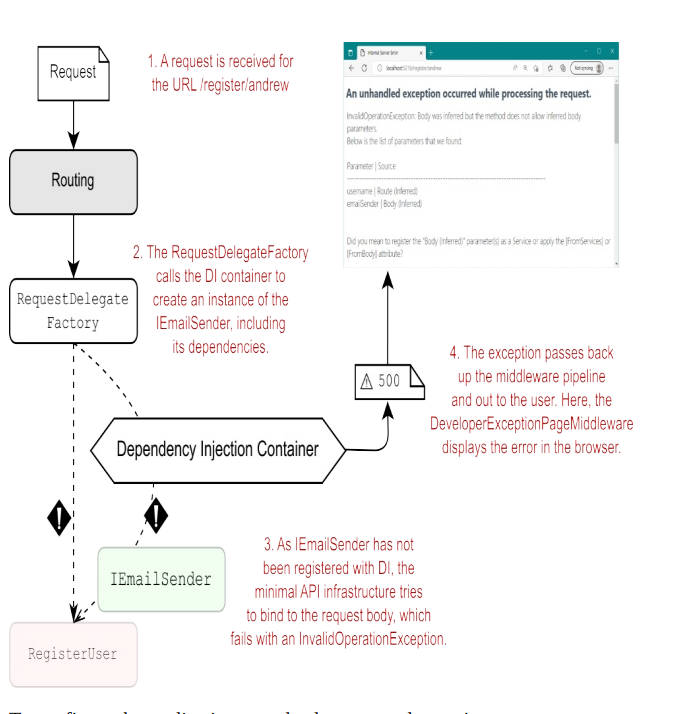

In [ ]:
public class EmailSender : IEmailSender
{
    private readonly NetworkClient _client;
    private readonly MessageFactory _factory;

    public EmailSender(MessageFactory factory, NetworkClient client)
    {
        _factory = factory;
        _client = client;
    }

    public void SendEmail(string username)
    {
        var email = _factory.Create(username);
        _client.SendEmail(email);
        Console.WriteLine($"Email sent to {username}!");
    }
}

public class NetworkClient
{
    private readonly EmailServerSettings _settings;
    public NetworkClient(EmailServerSettings settings)
    {
        _settings = settings;
    }
}

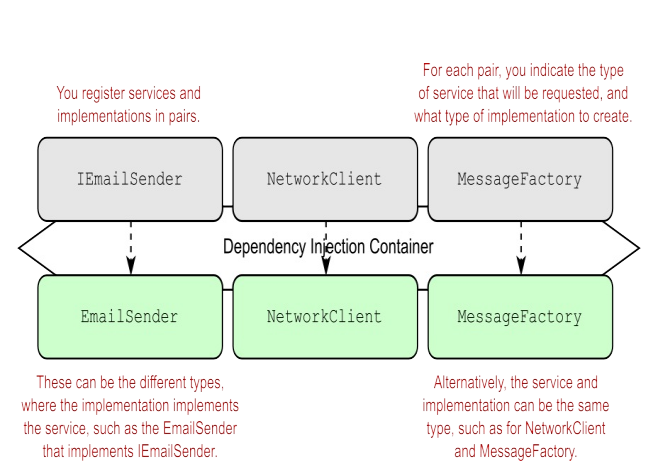

- When a service requires `IEmailSender`, use an instance of `EmailSender`.
- When a service requires `NetworkClient`, use an instance of `NetworkClient`.
- When a service requires `MessageFactory`, use an instance of `MessageFactory`.

These statements are made by calling various `Add*` methods on the `IServiceCollection`  
Each `Add*` method provides `three pieces` of ***information*** to the DI container  
- `Service type`—TService. This `class` or `interface` will be ***requested as a dependency***. It’s ***often an interface***, such as IEmailSender, but sometimes a concrete type, such as NetworkClient or MessageFactory.  
  
- `Implementation type`—TService or TImplementation. The container should create this class to fulfill the dependency. It must be a concrete type, such as EmailSender. It may be the same as the service type, as for NetworkClient and MessageFactory.
- `Lifetime`—`transient`, `singleton`, or `scoped`. The lifetime defines how long
an instance of the service should be used by the DI container.

In [ ]:
WebApplicationBuilder builder = WebApplication.CreateBuilder(args);

builder.Services.AddScoped<IEmailSender, EmailSender>(); 
builder.Services.AddScoped<NetworkClient>(); 
builder.Services.AddSingleton<MessageFactory>();

WebApplication app = builder.Build();

app.MapGet("/register/{username}", RegisterUser);

app.Run();
string RegisterUser(string username, IEmailSender emailSender)
{
    emailSender.SendEmail(username);
    return $"Email sent to {username}!";
}